# Exploratory Data Analysis

### Import necessary packages

In [65]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### Read data into pandas Dataframe

In [5]:
train_df = pd.read_csv('datasets/train.csv', index_col='PassengerId')
test_df = pd.read_csv('datasets/test.csv', index_col='PassengerId')
combined_df = pd.concat([train_df, test_df])
combined_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### Display info and statistical description of training set

In [7]:
combined_df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
combined_df.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'], dtype=object)

### Check distributions

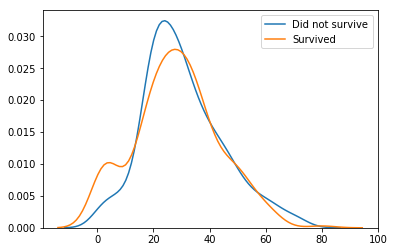

In [62]:
sns.kdeplot(combined_df[combined_df.Survived == 0].Age.dropna(), label='Did not survive')
sns.kdeplot(combined_df[combined_df.Survived == 1].Age.dropna(), label='Survived')

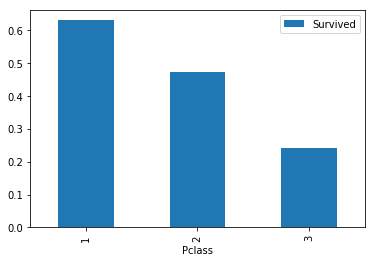

In [46]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot(kind='bar')

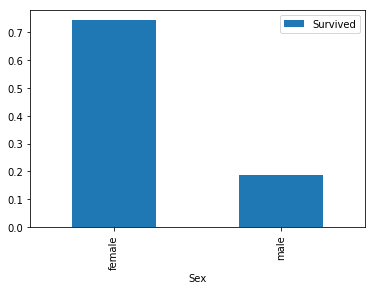

In [47]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar')

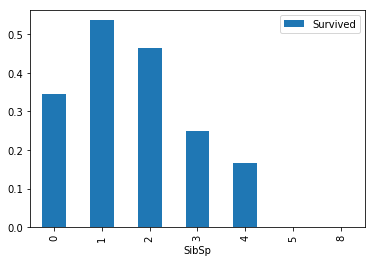

In [49]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot(kind='bar')

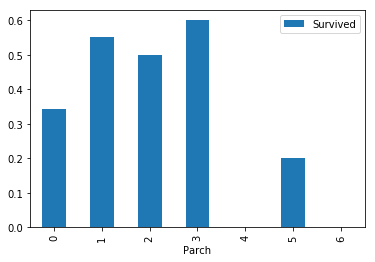

In [50]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().plot(kind='bar')

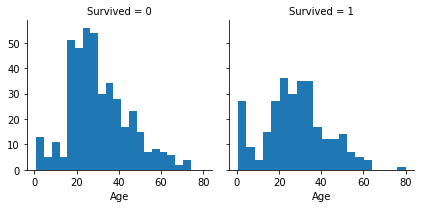

In [52]:
sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Age', bins=20)

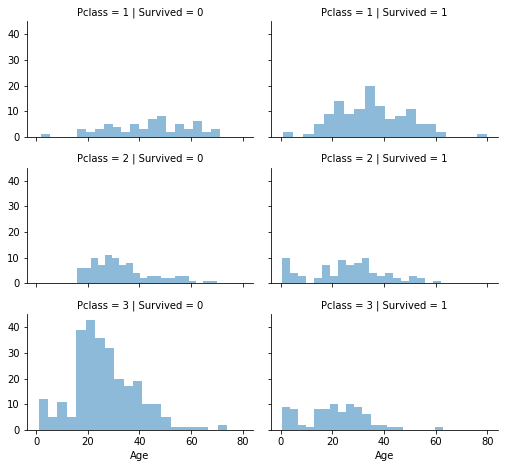

In [54]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

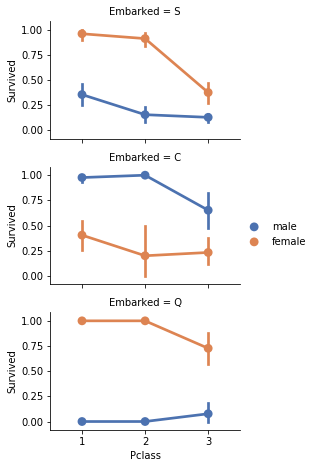

In [59]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Check numerical correlations

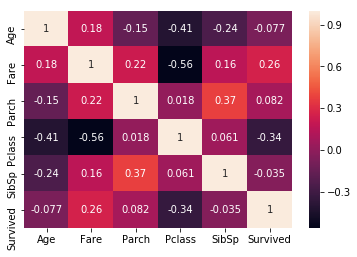

In [63]:
sns.heatmap(combined_df.corr(), annot=True)

### Check feature importances